##  Material for the course "Numerical Simulation of reactive flows"  
Author: Jun.-Prof. Federica Ferraro \
Technische Universität Braunschweig \
Institut für Flugantriebe und Strömungsmaschinen (IFAS)

Date: 14.12.2023

### Exercise 5 - Calculation of counterflow diffusion flames
Documentation:\
https://cantera.org/dev/python/thermo.html

source: https://cantera.org/examples/python/onedim/diffusion_flame.py

In [68]:
import cantera as ct
import numpy as np
import matplotlib.pyplot as plt

In [69]:
# Input parameters
p = ct.one_atm  # pressure
tin_f = 300.0  # fuel inlet temperature
tin_o = 300.0  # oxidizer inlet temperature
mdot_o = 0.72  # kg/m^2/s
mdot_f = 0.24  # kg/m^2/s

comp_o = 'O2:0.21, N2:0.79'  # air composition
comp_f = 'H2:1'  # fuel composition

width = 0.02  # Distance between inlets is 2 cm

loglevel = 1  # amount of diagnostic output (0 to 5)

In [70]:
# Create the gas object used to evaluate all thermodynamic, kinetic, and
# transport properties.
gas = ct.Solution('gri30.yaml')
gas.TP = gas.T, p

# Create an object representing the counterflow flame configuration,
# which consists of a fuel inlet on the left, the flow in the middle,
# and the oxidizer inlet on the right.
f = ct.CounterflowDiffusionFlame(gas, width=width)

In [71]:
# Set the state of the two inlets
f.fuel_inlet.mdot = mdot_f
f.fuel_inlet.X = comp_f
f.fuel_inlet.T = tin_f

f.oxidizer_inlet.mdot = mdot_o
f.oxidizer_inlet.X = comp_o
f.oxidizer_inlet.T = tin_o

# Set the boundary emissivities
f.boundary_emissivities = 0.0, 0.0
# Turn radiation off
f.radiation_enabled = False

#f.energy_enabled = True

f.set_refine_criteria(ratio=4, slope=0.2, curve=0.3, prune=0.04)

# Solve the problem
f.solve(loglevel, auto=True)
#f.show()


************ Solving on 6 point grid with energy equation enabled ************

..............................................................................
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     2.136e-05      5.945
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0001622      5.552
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0008211      4.848
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps      0.006235      3.526
Attempt Newton solution of steady-state problem...    success.

Problem solved on [6] point grid(s).

..............................................................................
grid refinement disabled.

******************** Solving with grid refinement enabled ********************

..............................................................................
Attempt Newton solution of steady-state probl

In [72]:
#f.show()

Text(0, 0.5, 'velocity (m/s)')

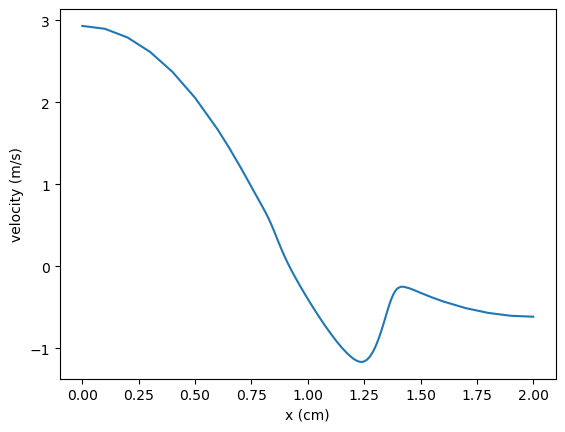

In [73]:
plt.plot(f.grid*100,f.velocity)
plt.xlabel('x (cm)')
plt.ylabel('velocity (m/s)')

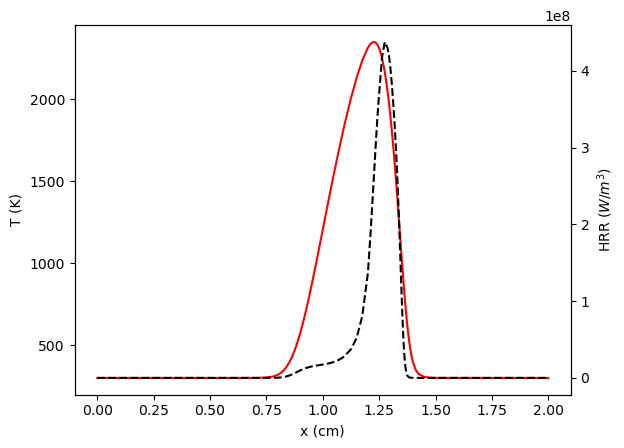

In [74]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

#plt.xlim(0,1)
ax1.plot(f.grid*100, f.T, "-",color="red")
ax2.plot(f.grid*100, f.heat_release_rate, "--",color="black")


#plt.legend(loc=2)
ax1.set_xlabel("x (cm)")
ax1.set_ylabel("T (K)");
ax2.set_ylabel("HRR ($W/m^3$)");

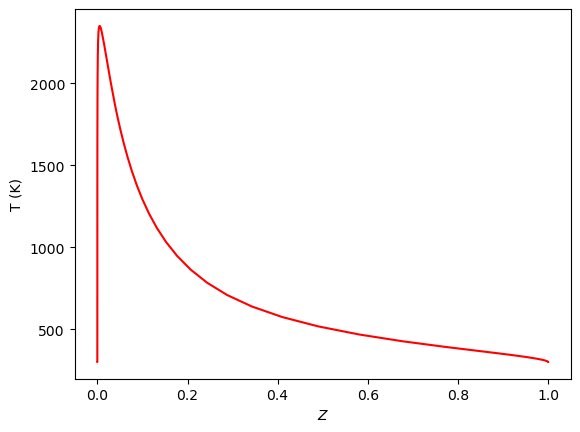

In [75]:
Z = f.Y[gas.species_index('H2')] 
fig, ax1 = plt.subplots()

#ax2 = ax1.twinx()

#plt.xlim(0,1)
ax1.plot(Z, f.T, "-",color="red")
#ax2.plot(f.grid*100, f.heat_release_rate, "--",color="black")


#plt.legend(loc=2)
ax1.set_xlabel("$Z$")
ax1.set_ylabel("T (K)");
#ax2.set_ylabel("HRR ($W/m^3$)");

In [76]:
T_norad=f.T
Z_norad=Z

# Turn on radiation and solve again
f.radiation_enabled = True
f.solve(loglevel=1, refine_grid=False)


..............................................................................
Attempt Newton solution of steady-state problem...    success.

Problem solved on [86] point grid(s).

..............................................................................
grid refinement disabled.


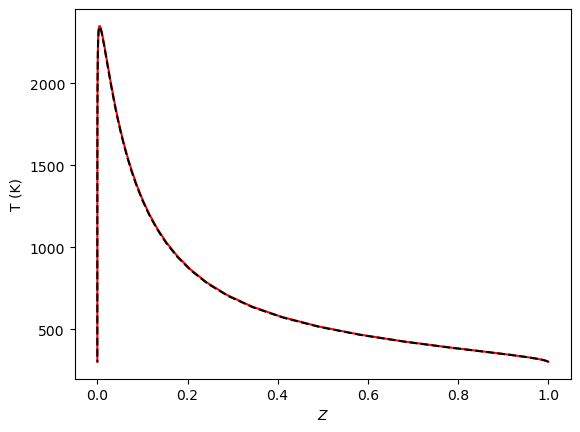

In [77]:
Z = f.Y[gas.species_index('H2')] 
fig, ax1 = plt.subplots()

#ax2 = ax1.twinx()

#plt.xlim(0,1)
ax1.plot(Z_norad, T_norad, "-",color="red")

ax1.plot(Z, f.T, "--",color="black")


#plt.legend(loc=2)
ax1.set_xlabel("$Z$")
ax1.set_ylabel("T (K)");
#ax2.set_ylabel("HRR ($W/m^3$)");

**Exercise**

Calculate a counterflow flame methane vs air at ambient pressure at two strain rates (choose two mass flow rates). Plot the Temperature as function of mixture fraction. Calculate the max velocity gradient. 

## Homework
https://cantera.org/examples/python/onedim/diffusion_flame_extinction.py.html